In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
import cmasher as cmr
%matplotlib inline

# Read the data in this cell to use it later

In [25]:
data = pd.read_csv("owid-covid-data.csv")
data = data[data["iso_code"] == "ESP"]
data.reset_index(inplace=True)
data.drop(columns="index", inplace=True)
print(data)

    iso_code continent location        date  total_cases  new_cases  \
0        ESP    Europe    Spain  2020-02-01          1.0        1.0   
1        ESP    Europe    Spain  2020-02-02          1.0        0.0   
2        ESP    Europe    Spain  2020-02-03          1.0        0.0   
3        ESP    Europe    Spain  2020-02-04          1.0        0.0   
4        ESP    Europe    Spain  2020-02-05          1.0        0.0   
..       ...       ...      ...         ...          ...        ...   
819      ESP    Europe    Spain  2022-04-30   11896152.0        0.0   
820      ESP    Europe    Spain  2022-05-01   11893480.0        NaN   
821      ESP    Europe    Spain  2022-05-02   11896152.0     2672.0   
822      ESP    Europe    Spain  2022-05-03   11953481.0    57329.0   
823      ESP    Europe    Spain  2022-05-04   11953481.0        NaN   

     new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                   NaN           NaN         NaN                  N

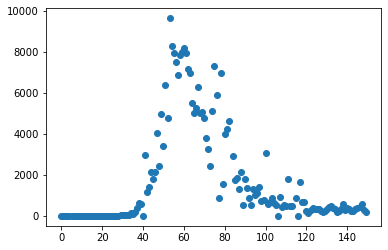

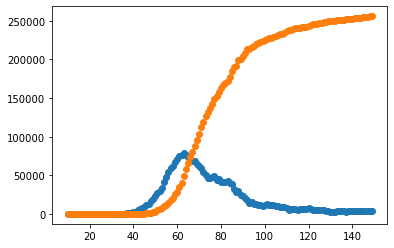

In [94]:
ndays = 150 
t = np.arange(ndays)

idata = np.zeros(ndays) * np.nan
for j in range(10, ndays):
    idata[j] = data["new_cases"][j-10:j].sum()
    
rdata = np.zeros(ndays) * np.nan
rdata[10] = data["new_cases"][0]
for j in range(11, ndays):
    if not np.isnan(data["new_cases"][j-10]):
        rdata[j] = rdata[j-1] + data["new_cases"][j-10]
    else:
        rdata[j] = rdata[j-1]    

    
plt.figure()
plt.plot(t, data["new_cases"][:ndays], marker="o", ls="none")
plt.show()

plt.figure()
plt.plot(t, idata, marker="o", ls="none")
plt.plot(t, rdata, marker="o", ls="none")
plt.show()

In [331]:
def solucion_SIR(t, alfa, gamma, I0):
    N = t[0]
    secciones = len(t)-2
    deltaT = t[10]-t[9]
    
    I = np.empty(secciones)
    R = np.empty(secciones)
    
    R0 =  t[1]
    I[0] = I0
    R[0] = R0

    for j in range (secciones-1):
        I[j+1] = I[j]*(1-gamma*deltaT+(alfa*deltaT/N)*(N-I[j]-R[j]))
        R[j+1] = R[j]+gamma*deltaT*I[j]

    
    res = np.concatenate((I, R))
    return res


def solucion_SIR_newcases(t, alfa, gamma, I0):
    N = t[0]
    secciones = len(t)-2
    
    deltaT = t[10]-t[9]
    
    I = np.empty(secciones)
    R = np.empty(secciones)
    
    R0 =  t[1]
    I[0] = I0
    R[0] = R0

    for j in range (secciones-1):
        I[j+1] = I[j]*(1-gamma*deltaT+(alfa*deltaT/N)*(N-I[j]-R[j]))
        R[j+1] = R[j]+gamma*deltaT*I[j]

    newI = I[1:] - I[:-1]
    return newI

def SIR(t, alfa, gamma):
    N = 100
    secciones = len(t)
    deltaT = t[1]-t[0]
    
    I = np.empty(secciones)
    R = np.empty(secciones)
    
    I0 = 5
    R0 = 5

    for j in range (secciones-1):
        I[j+1] = I[j]*(1-gamma*deltaT+(alfa*deltaT/N)*(N-I[j]-R[j]))
        R[j+1] = R[j]+gamma*deltaT*I[j]

    
    res = np.concatenate((I, R))
    return res

# Generate synthetic data and fit it

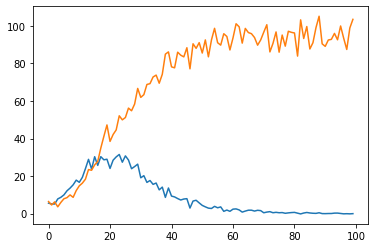

In [75]:
pars = np.concatenate((np.array([100]), np.arange(100)))
res = solucion_SIR(pars, 0.3, 0.1)

isol, rsol = res[:res.size//2],  res[res.size//2:]


idata = isol + 0.5*np.sqrt(isol ) * np.random.standard_normal(size=isol.size)
rdata = rsol + 0.5*np.sqrt(rsol ) * np.random.standard_normal(size=rsol.size)

plt.figure()
plt.plot(pars[1:], idata)
plt.plot(pars[1:], rdata)
plt.show()

/tmp/ipykernel_2859/4045475584.py:17: RuntimeWarning: overflow encountered in double_scalars
  I[j+1] = I[j]*(1-gamma*deltaT+(alfa*deltaT/N)*(N-I[j]-R[j]))
/tmp/ipykernel_2859/4045475584.py:17: RuntimeWarning: invalid value encountered in double_scalars
  I[j+1] = I[j]*(1-gamma*deltaT+(alfa*deltaT/N)*(N-I[j]-R[j]))


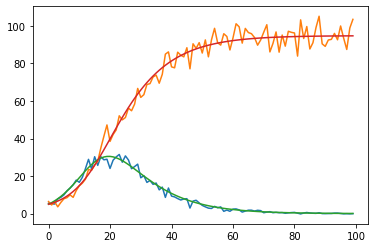

In [76]:
ydata = np.concatenate((idata, rdata))
popt, pcov = curve_fit(solucion_SIR, pars, ydata)
a,g = popt
res = solucion_SIR(pars, a, g)
isol, rsol = res[:res.size//2],  res[res.size//2:]

plt.figure()
plt.plot(pars[1:], idata)
plt.plot(pars[1:], rdata)
plt.plot(pars[1:], isol)
plt.plot(pars[1:], rsol)
plt.show()

# Do it with the real data 

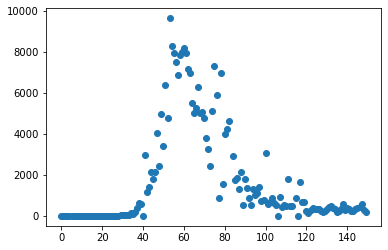

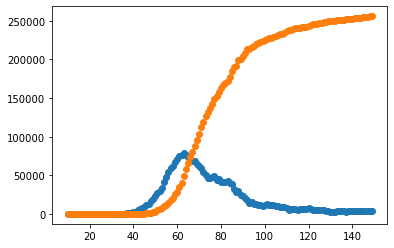

In [95]:
ndays = 150 
t = np.arange(ndays)

idata = np.zeros(ndays) * np.nan
for j in range(10, ndays):
    idata[j] = data["new_cases"][j-10:j].sum()
    
rdata = np.zeros(ndays) * np.nan
rdata[10] = data["new_cases"][0]
for j in range(11, ndays):
    if not np.isnan(data["new_cases"][j-10]):
        rdata[j] = rdata[j-1] + data["new_cases"][j-10]
    else:
        rdata[j] = rdata[j-1]    

    
plt.figure()
plt.plot(t, data["new_cases"][:ndays], marker="o", ls="none")
plt.show()

plt.figure()
plt.plot(t, idata, marker="o", ls="none")
plt.plot(t, rdata, marker="o", ls="none")
plt.show()

1.0 1.0


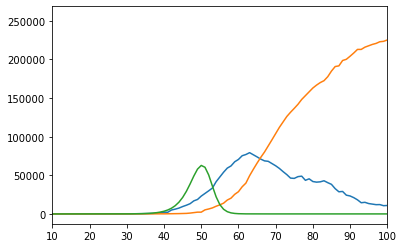

In [284]:
print(idata[11], rdata[11])
n_spain = data["population"].mean()


ydata = np.concatenate((idata[10:], rdata[10:]))
pars = np.concatenate((np.array([n_spain, 0.0]), t[10:]))

popt, pcov = curve_fit(solucion_SIR, pars, ydata, p0=(6.5, 5.5, 0.02), bounds=[(5.0, 5.0, 0.0), (7.0,6.0,0.05)])
r0 = 1.05
a = 10.0
g = a/r0
i0 = 0.03
#a,g,i0 = popt
res = solucion_SIR(pars, a, g,i0)
isol, rsol = res[:res.size//2],  res[res.size//2:]

plt.figure()
#plt.yscale("log")
plt.xlim(10,100)
plt.plot(t, idata)
plt.plot(t, rdata)
plt.plot(pars[2:], isol)
#plt.plot(pars[1:], rsol)
plt.show()

147
144


ValueError: x and y must have same first dimension, but have shapes (150,) and (144,)

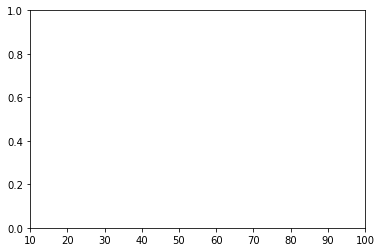

In [334]:
n_spain = data["population"].mean()

skipdays = 5

idata = data["new_cases_smoothed"][skipdays:ndays-1]
idata.interpolate(inplace=True, method="linear")
pars = np.concatenate((np.array([n_spain, 0.0]), np.arange(skipdays, ndays)))

print(pars.size)
print(idata.size)
popt, pcov = curve_fit(solucion_SIR_newcases, pars, idata, p0=(6.5, 5.5, 0.02), bounds=[(5.0, 5.0, 0.0), (7.0,6.0,0.05)])
a,g,i0 = popt
res = solucion_SIR_newcases(pars, a, g,i0)
isol, rsol = res[:res.size//2],  res[res.size//2:]

plt.figure()
#plt.yscale("log")
plt.xlim(10,100)
plt.plot(t, idata)
plt.plot(t, rdata)
plt.plot(pars[2:], isol)
#plt.plot(pars[1:], rsol)
plt.show()